Importing all the necessary Libraries

In [259]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix


Loading the Data

In [260]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('credit card.csv')

Understanding the Data

In [261]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Describing the Data

In [262]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [263]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [264]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64



This Dataset is highly unbalanced

0 --> Normal Transaction

1 --> fraudulent transaction


In [265]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [266]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Print the amount details for Normal Transaction

In [267]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Print the amount details for Fraud Transaction

In [268]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

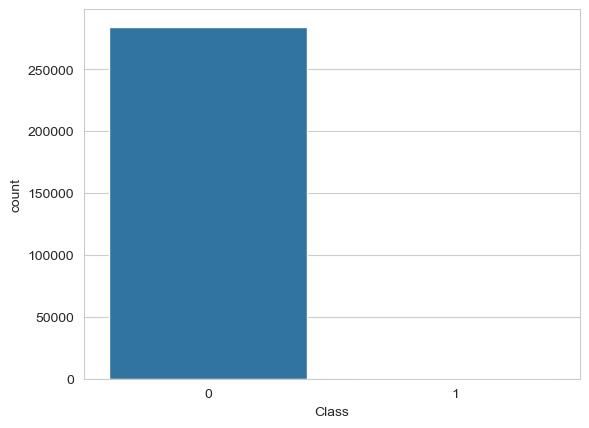

In [269]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=credit_card_data)

Plotting the Correlation Matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.




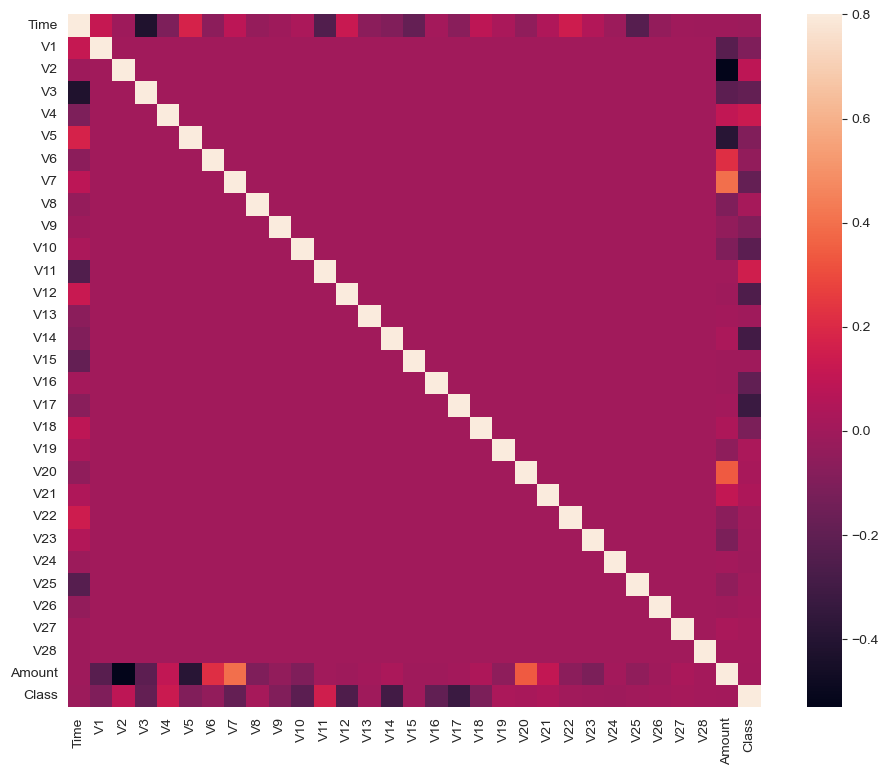

In [270]:
# Correlation matrix
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

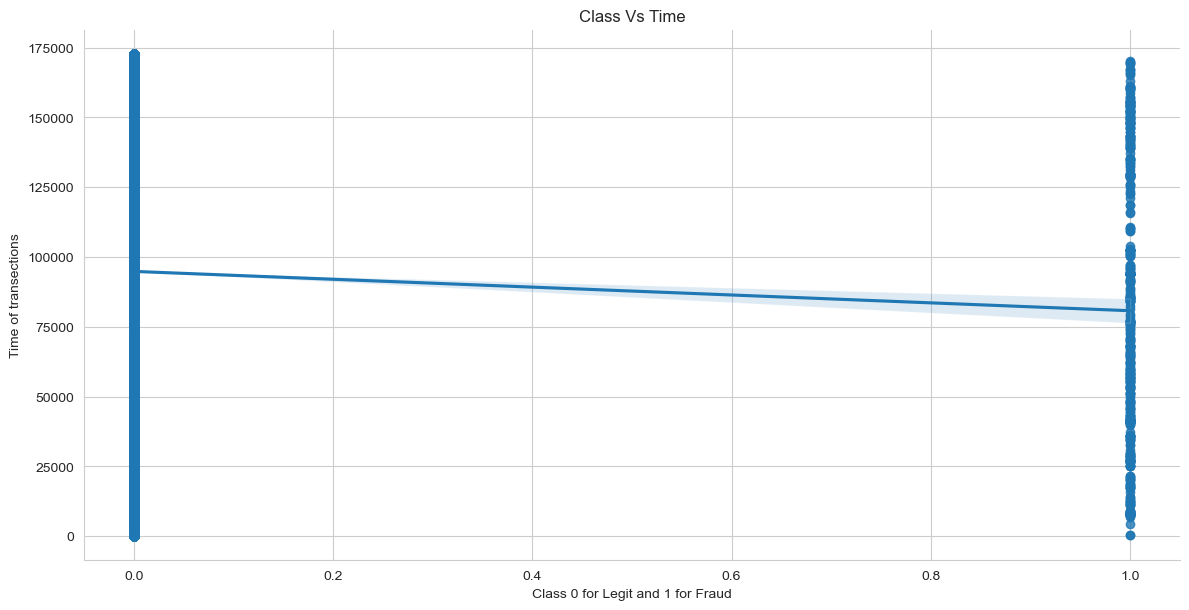

In [271]:
sns.lmplot(x='Class',y='Time',data=credit_card_data,aspect=2,height=6)
plt.xlabel('Class 0 for Legit and 1 for Fraud')
plt.ylabel('Time of transections')
plt.title('Class Vs Time');

In [272]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [273]:
np.random.seed(492)

Concatenating two DataFrames



In [274]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [275]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64477,51160.0,-0.473404,1.811874,-0.384438,0.935675,1.500809,-1.092740,1.181286,-0.012862,-1.274874,...,-0.033762,-0.078557,-0.320337,-0.112531,0.253458,-0.335575,0.101158,0.127393,0.89,0
132793,80115.0,-1.678735,0.168700,-0.437086,0.123896,2.326155,3.458937,-0.614202,1.308469,-0.432673,...,0.133503,0.632010,0.340390,1.028085,0.187972,-0.121907,0.229593,0.028421,34.74,0
224253,143710.0,1.975449,-0.420828,-2.227846,-0.795648,2.009145,3.516588,-1.065074,1.007788,1.119685,...,-0.262428,-0.713707,0.407371,0.570787,-0.463239,-0.262799,0.043475,-0.015287,7.70,0
267709,162889.0,1.682665,-0.835290,0.231941,1.265903,-0.999093,0.692953,-1.188642,0.473929,1.360880,...,0.346233,0.848914,0.165587,0.647980,-0.422958,-0.642131,0.063527,-0.006496,100.00,0
20186,30841.0,1.262103,0.306259,0.527579,0.612359,-0.410995,-0.972950,0.112174,-0.247923,-0.068396,...,-0.249384,-0.683386,0.127377,0.395282,0.243631,0.092397,-0.024055,0.020502,1.29,0


In [276]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [277]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [278]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92323.717480,0.007227,0.010114,-0.019289,0.041670,-0.039408,-0.070038,0.014162,0.049597,-0.070297,...,-0.030177,-0.035331,0.029706,0.042752,-0.001729,-0.004351,0.025591,-0.011462,0.000458,88.755955
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: xlabel='Class', ylabel='count'>

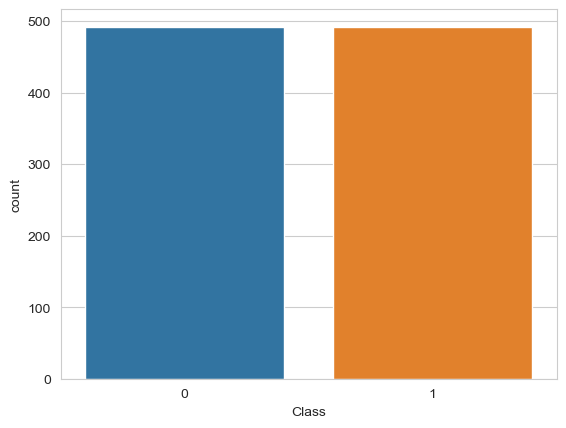

In [279]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=new_dataset)

Plotting the Correlation Matrix of new dataset after under sampling

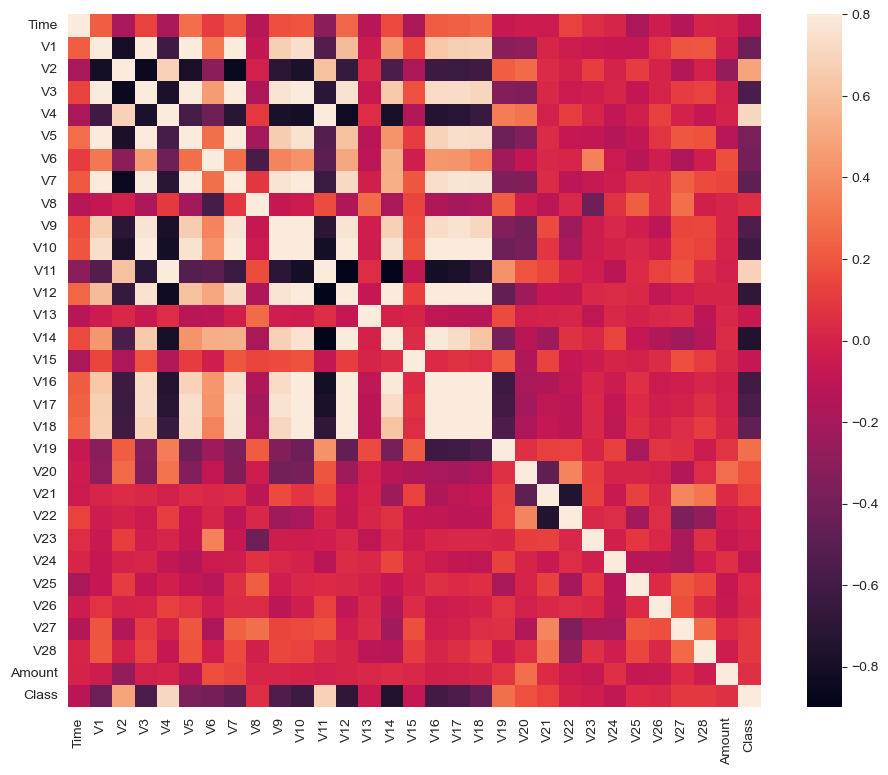

In [280]:
# Correlation matrix
corrmat = new_dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Text(0.5, 1.0, 'Scatter plot of Class vs Time')

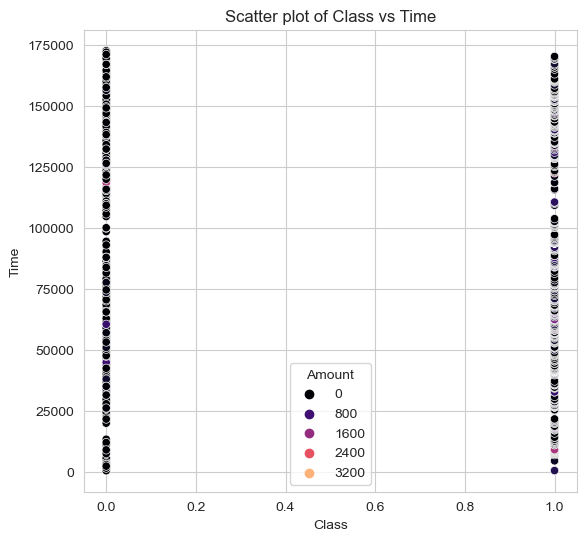

In [281]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Class',y='Time',data=new_dataset,palette='magma',hue='Amount',ax=ax)
ax.set_title('Scatter plot of Class vs Time')



Splitting the data into Features & Targets

In [282]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [283]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
64477    51160.0 -0.473404  1.811874 -0.384438  0.935675  1.500809 -1.092740   
132793   80115.0 -1.678735  0.168700 -0.437086  0.123896  2.326155  3.458937   
224253  143710.0  1.975449 -0.420828 -2.227846 -0.795648  2.009145  3.516588   
267709  162889.0  1.682665 -0.835290  0.231941  1.265903 -0.999093  0.692953   
20186    30841.0  1.262103  0.306259  0.527579  0.612359 -0.410995 -0.972950   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [284]:
print(Y)

64477     0
132793    0
224253    0
267709    0
20186     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [285]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [286]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [287]:
model = LogisticRegression()

In [288]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [289]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [290]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


In [291]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [292]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


In [293]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
# predictions
yPred = rfc.predict(X_test)

 Visualizing the Confusion Matrix

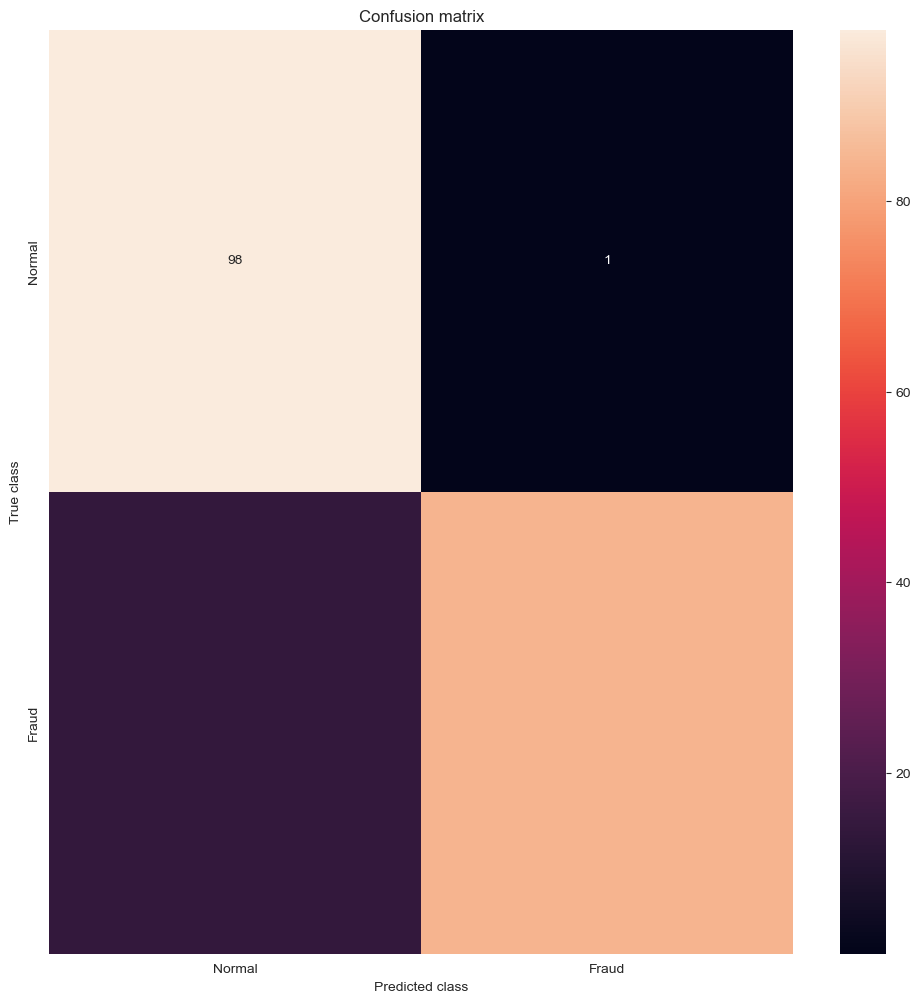

In [294]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()